#  **Sentiment analysis of text** 
Sentiment analysis is a powerful technique in natural language processing (NLP) that aims to determine the sentiment or emotional tone of a given text. It plays a crucial role in understanding people's opinions and attitudes towards a particular subject or entity.


NLTk (Natural Language Toolkit) is a popular Python library widely used for NLP tasks, including sentiment analysis. It provides a range of tools and functionalities for text preprocessing, feature extraction, and classification, making it a go-to choice for many NLP practitioners.


VADER (Valence Aware Dictionary and sEntiment Reasoner) is a rule-based sentiment analysis tool specifically designed for social media texts. It utilizes a pre-trained sentiment lexicon and employs lexical and grammatical heuristics to determine the sentiment (positive, negative, or neutral) of a given text. VADER is a part of the NLTK package and can be easily imported into your Python environment.


BERT and RoBERTa are transformer-based models used for natural language processing. BERT introduced bidirectional training, while RoBERTa optimized and improved upon BERT's performance. Both models use the transformer architecture and have revolutionized NLP tasks. RoBERTa can be seen as an advancement of BERT.


Transformers have revolutionized the field of NLP with their ability to capture contextual information effectively. Transformer-based models, such as BERT (Bidirectional Encoder Representations from Transformers), have achieved state-of-the-art results on various NLP tasks, including sentiment analysis.

## Objective 
In this notebook we will be doin sentiment analysis in python using different libraries and techniques. 

**The dataset we are using is [Amazon Fine Food Reviews](https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews) from Kaggle.**

### What we are going to do in this notebook?

 0. Preparing the data.

 1. Using VADER (Valence Aware Dictionary and sEntiment Reasoner) from NLTK and see how it performs on our dataset.
   
 2. Using ROBERTA (Robustly Optimized BERT Pretraining Approach) from Hugging Face and see how it performs on our dataset.

 3. Combine and ensemble the results of VADER and ROBERTA and see if we can get better results.

 4. Transformer pipline by Hugging Face.


## Step 0: Preparing the data
- Importing the libraries
- Preparing the data and checking the data
- Performing EDA
- Performing NLP


In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

In [2]:
#reading the data
df=pd.read_csv('Reviews.csv')


In [3]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [4]:
print(df.shape)

(568454, 10)


In [69]:
#data consist on 568454 rows and 10 columns so we will take 10000 rows for our analysis
df=df.head(100)
print(df.shape)

(100, 10)


In [59]:
df.shape

(500, 10)

### Basic EDA

In [60]:
#checking the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      500 non-null    int64 
 1   ProductId               500 non-null    object
 2   UserId                  500 non-null    object
 3   ProfileName             500 non-null    object
 4   HelpfulnessNumerator    500 non-null    int64 
 5   HelpfulnessDenominator  500 non-null    int64 
 6   Score                   500 non-null    int64 
 7   Time                    500 non-null    int64 
 8   Summary                 500 non-null    object
 9   Text                    500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


In [61]:
#checking for null values
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [9]:
#checking for duplicate values
df.duplicated().sum()


0

<Axes: title={'center': 'Distribution of Scores'}, xlabel='Score', ylabel='Count'>

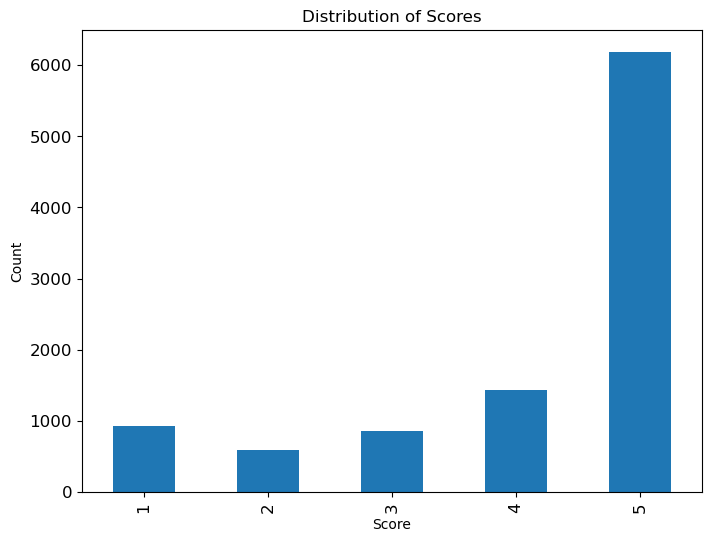

In [10]:
#checking the score distribution
df['Score'].value_counts().sort_index().plot(kind='bar', title='Distribution of Scores',
                                            figsize=(8,6), fontsize=12, xlabel='Score', ylabel='Count') 

### Basic NLTK


In [43]:
example=df['Text'][1]
print(example)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


In [44]:
tokens=nltk.word_tokenize(example)
tokens[:10]

['Product',
 'arrived',
 'labeled',
 'as',
 'Jumbo',
 'Salted',
 'Peanuts',
 '...',
 'the',
 'peanuts']

In [13]:
# nltk.download('averaged_perceptron_tagger')

In [45]:
tagged=nltk.pos_tag(tokens)
tagged[:10]


[('Product', 'NNP'),
 ('arrived', 'VBD'),
 ('labeled', 'VBN'),
 ('as', 'IN'),
 ('Jumbo', 'NNP'),
 ('Salted', 'NNP'),
 ('Peanuts', 'NNP'),
 ('...', ':'),
 ('the', 'DT'),
 ('peanuts', 'NNS')]

In [39]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Haseeb\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [95]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  (GPE Product/NNP)
  arrived/VBD
  labeled/VBN
  as/IN
  (PERSON Jumbo/NNP Salted/NNP Peanuts/NNP)
  .../:
  the/DT
  peanuts/NNS
  were/VBD
  actually/RB
  small/JJ
  sized/VBN
  unsalted/JJ
  ./.
  Not/RB
  sure/JJ
  if/IN
  this/DT
  was/VBD
  an/DT
  error/NN
  or/CC
  if/IN
  the/DT
  vendor/NN
  intended/VBN
  to/TO
  represent/VB
  the/DT
  product/NN
  as/IN
  ``/``
  Jumbo/NNP
  ''/''
  ./.)


## Step 1: Vader sentiment analysis
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. It is fully open-sourced under the [MIT License].

- This use the "bag of words" approch:
  1. Stop words are removed
  2. Each word is given a score 

In [17]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia=SentimentIntensityAnalyzer()



In [18]:
#checking the polarity of sentence
sia.polarity_scores("i am happy")

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

In [47]:
#checking the polarity of example
sia.polarity_scores(example)

{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [62]:
#run the polatity score on 500 selection review from the dataset
res={}
for i , row in tqdm(df.iterrows(), total=len(df)):
    text=row['Text']
    myid=row['Id']
    res[myid]=sia.polarity_scores(text)




  0%|          | 0/500 [00:00<?, ?it/s]

In [63]:
#making a dataframe of the result
vaders=pd.DataFrame(res).T

#marging the vaders dataframe with the original dataframe
vaders= vaders.reset_index().rename(columns={'index':'Id'})
vaders= vaders.merge(df, how='left')

#checking the shape of the dataframe
vaders.head(5)

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


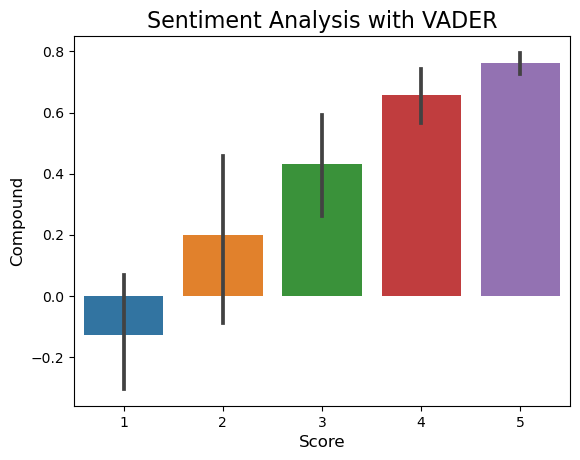

In [64]:
#plot a bar plot with score and compound sentiment
bar= sns.barplot(data=vaders, x='Score', y='compound')
bar.set_title('Sentiment Analysis with VADER', fontsize=16)
bar.set_xlabel('Score', fontsize=12)
bar.set_ylabel('Compound', fontsize=12)
plt.show()



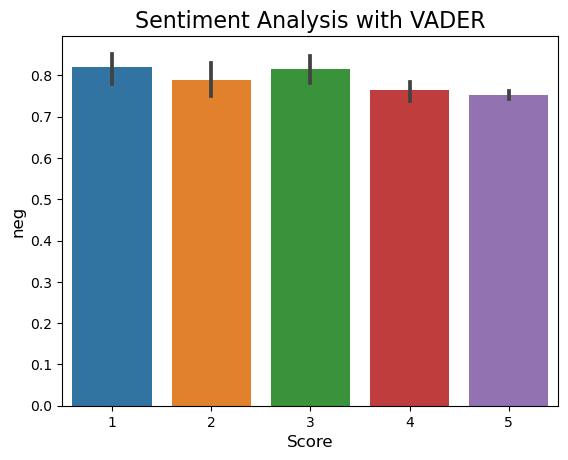

In [80]:
#plot a bar plot with score and negative sentiment
bar= sns.barplot(data=vaders, x='Score', y='neu')
bar.set_title('Sentiment Analysis with VADER', fontsize=16)
bar.set_xlabel('Score', fontsize=12)
bar.set_ylabel('neg', fontsize=12)
plt.show()



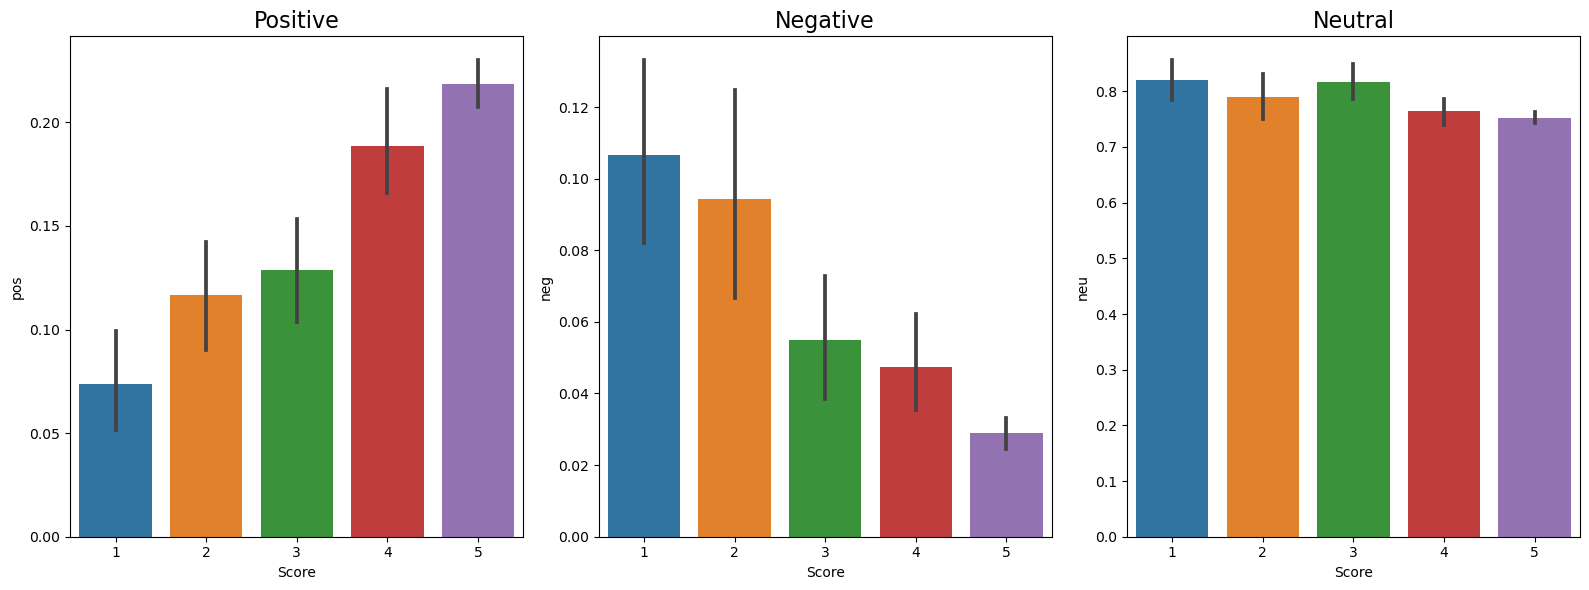

In [81]:
#ploting a bar plot with score and positive, negative and neutral side by side 
fig, ax = plt.subplots(1,3 , figsize=(16,6))
sns.barplot(data=vaders, x='Score', y='pos', ax=ax[0])
sns.barplot(data=vaders, x='Score', y='neg', ax=ax[1])
sns.barplot(data=vaders, x='Score', y='neu', ax=ax[2])
ax[0].set_title('Positive', fontsize=16)
ax[1].set_title('Negative', fontsize=16)
ax[2].set_title('Neutral', fontsize=16)
plt.tight_layout()
plt.show()


## Step 2: RoBERTA sentiment analysis
RoBERTa is an improved version of the BERT model for language understanding tasks. It is **Hugging face library** , It excels in sentiment analysis by capturing contextual information and linguistic patterns. Fine-tuning RoBERTa enables accurate classification of text into positive, negative, or neutral sentiments.





- Use a model trained of a large corpus of data 
- Transformer model accounts for the words but also context related of each word


In [25]:
#import libraries
import transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification

from scipy.special import softmax

In [26]:
#load the model and tokenizer
model= f"Cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(model)
model=AutoModelForSequenceClassification.from_pretrained(model)

In [82]:
#vader model on example
print(example)
sia.polarity_scores(example)

Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".


{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}

In [49]:
#for running on roberta model we have to encode the text on example
encoded_text = tokenizer(example, return_tensors='pt')
#** is used to unpack the dictionary
output = model(**encoded_text)
score=output[0].detach().numpy()

#softmax is used to convert the score into probability
score=softmax(score)

#score distribution
score_dist = {
    'roberta_Neg': score[0,0],
    'roberta_Neu': score[0,1],
    'roberta_Pos': score[0,2]
}

print(score_dist)


{'roberta_Neg': 0.5089861, 'roberta_Neu': 0.4524135, 'roberta_Pos': 0.038600363}


In [70]:
# function which takes 500 selected reviews and run the roberta model on it

def polarity_scores_roberta(example):
    #for running on roberta
    encoded_text = tokenizer(example, return_tensors='pt')
    #** is used to unpack the dictionary
    output = model(**encoded_text)
    score=output[0].detach().numpy()
    score=softmax(score)

    score_dist = {
        'roberta_Neg': score[0,0],
        'roberta_Neu': score[0,1],
        'roberta_Pos': score[0,2]
    }

    return score_dist

In [71]:
#iterating over the dataframe of 500 selected reviews 
#running both vader and roberta model
res={}
for i , row in tqdm(df.iterrows(), total=len(df)):
    try:
        text=row['Text']
        myid=row['Id']
        vader_result=sia.polarity_scores(text)
        
        #changing the neg neu and pos to vader_neg vader_neu and vader_pos
        vader_result={f'vader_{k}':v for k,v in vader_result.items()}

        roberta_result=polarity_scores_roberta(text)
        #combining both the results
        both_results={**vader_result, **roberta_result}
        res[myid]=both_results

    except RuntimeError:
        print(f'Error for ID: {myid}')

  0%|          | 0/100 [00:00<?, ?it/s]

Error for ID: 83


In [56]:
#combining both the results
both_results

{'vader_neg': 0.0,
 'vader_neu': 0.695,
 'vader_pos': 0.305,
 'vader_compound': 0.9441,
 'roberta_Neg': 0.00962425,
 'roberta_Neu': 0.0499804,
 'roberta_Pos': 0.94039536}

In [83]:
#making a dataframe of the result
results_df=pd.DataFrame(res).T

#marging the vaders Scores and roberta dataframe with the original dataframe
results_df= results_df.reset_index().rename(columns={'index':'Id'})
results_df= results_df.merge(df, how='left')
results_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_Neg,roberta_Neu,roberta_Pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452413,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098067,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 3. Combining and comparing both models

- Combining the results of both models
- Plotting the results in pairplot
  

In [96]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_Neg', 'roberta_Neu', 'roberta_Pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

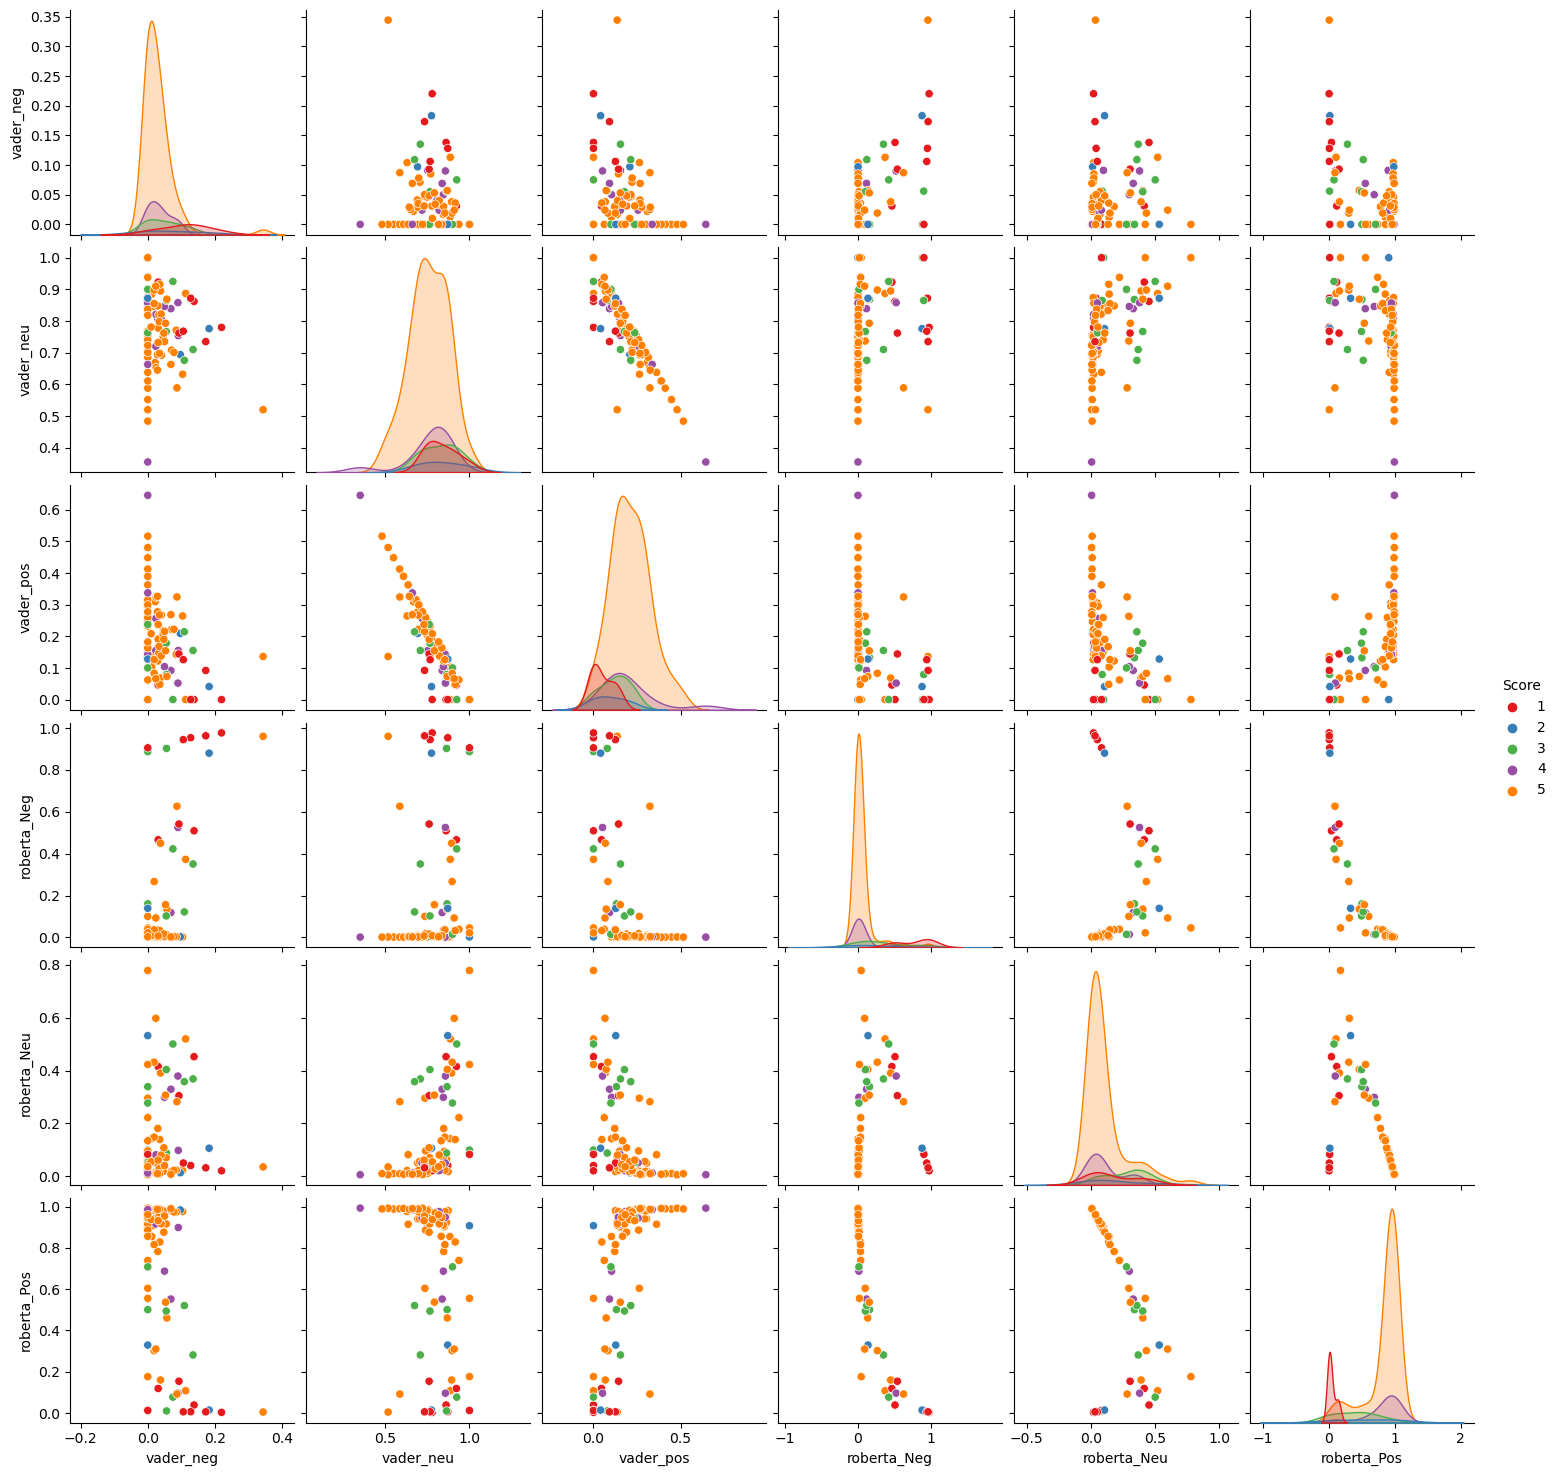

In [79]:
#compare the vader and roberta score using seaborn pairplot
sns.pairplot(data=results_df, vars=['vader_neg', 'vader_neu', 'vader_pos',
                         'roberta_Neg', 'roberta_Neu', 'roberta_Pos'],
                          hue='Score', palette='Set1')

plt.show()

## Step 4: Transformer pipeline by HUGGING FACE

It is a simple way to use any model on any text you want. It is a great tool for doing quick POCs and testing the models on your dataset before you proceed with fine-tuning and training.



In [28]:
#first we will install the transformers library
from transformers import pipeline

#then we will load the sentiment analysis pipeline
sent_pipeline = pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [94]:
#run the sentiment analysis pipeline on example
sent_pipeline("Buyer Beware Please! This sweetener is not for everybody. Maltitol is an alcohol sugar and can be undigestible in the body. You will know a short time after consuming it if you are one of the unsuspecting many who cannot digest it by the extreme intestinal bloating and cramping and massive amounts of gas a person can experience. Nausea, diarrhea & headaches can also be experienced. I learned my lesson the hard way years ago when I fell in love with the sugar-free chocolates suzanne sommers used to sell. I thought I'd found sugar-free chocolate nirvana at first taste but the bliss was short lived when the terrible side effects of maltitol kicked in. The discomfort was unlike anything I had ever felt before. I blew up like a balloon and had very painful abdominal cramping. As the symptoms passed, this too was very unpleasant. Though hard for me to believe a low calorie sweetener could be the culprit, all symptoms were gone when I stopped eating the chocolate. My hunch it had something to do with the maltitol were unfortunately confirmed for me about a year later when I purchased some delicious sugar-free popcorn at my local market. The taste was amazing and while I was looking at the label wondering what could possibly make this yummy, new sugar-free treat taste so good, my heart sank when I followed the little asterisk next to sugarfree sweetener* down to the very bottom of the label and read 'maltitol' in tiny little letters! Thank goodness I'd eaten only a little. I still ended up with all the same side-effects but for a much shorter duration. Some people can use maltitol to their heart's content but others, like me, can have a bad reaction to it. In case you're like me, ... it's not you ...it's the maltitol!")

[{'label': 'NEGATIVE', 'score': 0.9935736060142517}]